In [14]:
# Imports.
import io
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import gensim
from sklearn.manifold import TSNE

In [2]:
# Load the dataset.
df = pd.read_csv("../../data/comments_testdata_small.csv")

# Clean comments for any unwanted elements. Consider adjusting based on clustering models.
for i in range(len(df)):
    df.at[i, 'Comment'] = str(df.loc[i]['Comment']).replace('xxxx', '').replace('*', '')
    
# Inspect the dataset.
print("Length dataset: {}".format(len(df)))
print("Example comment:\n{}".format(df.loc[0]['Comment']))

Length dataset: 100
Example comment:
Teach  manners. Better pay less hours. Pay over time for filling in this.


In [3]:
# Word2Vec general model.
vector_path = 'GoogleNewsVectors300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(vector_path, binary=True)

In [4]:
# Mean embeddings for each comment.
mean_embeddings = []
for i in range(len(df)):
    tokens = nltk.tokenize.word_tokenize(df.loc[i]['Comment'])
    embeddings = []
    for token in tokens:
        try:
            embeddings.append(model[token])
        except KeyError as e:
            # Ignore the word if it does not exist.
            pass
    
    mean_embedding = np.array(embeddings).mean(axis=0)
    mean_embeddings.append(mean_embedding)

In [5]:
# Just a quick look at the mean_embeddings to see that they are real.
print(mean_embeddings[0])

[ 2.36675553e-02  6.84110224e-02  1.14605241e-02  1.28540039e-01
 -3.49684507e-02  1.11459587e-02  3.14565795e-03 -7.71953911e-02
  3.52125913e-02  8.29045251e-02 -5.19972574e-03  7.56929815e-02
  2.99641527e-02  2.06017122e-02 -3.53909992e-02  1.20726362e-01
  9.57219079e-02  1.57752400e-03 -3.22547331e-02  5.28141893e-02
  5.31146713e-02  3.80483791e-02  3.13509442e-02  4.44825962e-02
 -1.87518783e-02  9.81577337e-02 -7.18231201e-02  6.06501661e-02
  2.42966879e-03  6.43780082e-02 -9.79731604e-02  3.25880796e-02
 -6.01243228e-02 -4.08750698e-02  2.74118278e-02 -5.27020954e-02
  8.92052267e-05 -3.78042385e-02 -1.58409700e-02  9.99380276e-02
  6.24812208e-02 -1.04853705e-01  4.15391177e-02 -6.86927214e-02
 -7.27445185e-02 -3.81892286e-02 -6.31432161e-02  8.48576501e-02
 -2.76160613e-02 -2.29116576e-03 -6.69086128e-02 -2.00007507e-03
 -5.25841373e-04  1.39629655e-02  7.67446682e-02  3.29284668e-02
 -1.27280608e-01 -6.22652508e-02  7.10546039e-03 -9.75341797e-02
 -5.62368557e-02  6.90137

In [182]:
# Prepare mean embeddings for visualization.
filename = 'mean_embeddings.tsv'
with open(filename, 'w', newline='') as f:
    for vector in mean_embeddings:
        values = []
        for value in vector:
            values.append(value)
    
        tsv_output = csv.writer(f, delimiter='\t')
        tsv_output.writerow(values)

# Visualize the mean embeddings via TensorFlow Projector.
# https://projector.tensorflow.org/
# Interesting visualizations: t-SNE, UMAP

In [189]:
# We already see some clusters from t-SNE visualization. Let's use this to generate clusters we can analyze.
# Use parameters from Projector visualisation.
# np.random.seed(67689)
# x = np.array(mean_embeddings)
# x_embedded = TSNE(n_components=3, perplexity=7, early_exaggeration=15.0, n_iter=10000, learning_rate=10, n_iter_without_progress=20000, metric='cosine').fit_transform(x)
# x_embedded.shape

(100, 3)

In [190]:
# Checking the resultant embeddings in projector again.
# Interesting visualizations: UMAP
filename = 'mean_embeddings_TSNE.tsv'
with open(filename, 'w', newline='') as f:
    for vector in x_embedded:
        values = []
        for value in vector:
            values.append(value)
    
        tsv_output = csv.writer(f, delimiter='\t')
        tsv_output.writerow(values)

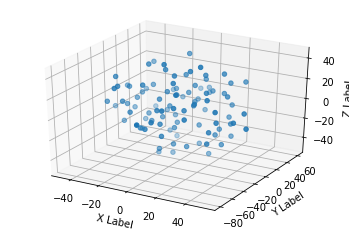

In [181]:
# Visualize the data we just created.
from mpl_toolkits.mplot3d import Axes3D

# 2-D Visualization
# ax = plt.gca()
# xs = x_embedded[:,0]
# ys = x_embedded[:,1]
# plt.scatter(xs, ys)
# # ax.set_yscale('log')
# # ax.set_xscale('log')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# plt.show()

# 3-D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = x_embedded[:,0]
ys = x_embedded[:,1]
zs = x_embedded[:,2]
ax.scatter(xs, ys, zs)
# ax.set_xlim3d(-500, 500)
# ax.set_ylim3d(-500, 500)
# ax.set_zlim3d(-50, 50)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()